In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**DATA COLLECTION** - IMPORTING TWITTER SENTIMENT DATASET

TweetEval Dataset

In [ ]:
from datasets import load_dataset
dataset = load_dataset("tweet_eval", "sentiment")
print(dataset)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


Converting into Dataframe

In [ ]:
import pandas as pd

# Convert train split into DataFrame
df_train = dataset["train"].to_pandas()
df_val   = dataset["validation"].to_pandas()
df_test  = dataset["test"].to_pandas()


In [ ]:
print(df_train.head())

                                                text  label
0  "QT @user In the original draft of the 7th boo...      2
1  "Ben Smith / Smith (concussion) remains out of...      1
2  Sorry bout the stream last night I crashed out...      1
3  Chase Headley's RBI double in the 8th inning o...      1
4  @user Alciato: Bee will invest 150 million in ...      2


In [ ]:
twitter_data= df_train

In [ ]:
twitter_data.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


**IMPORTING THE DEPENDENCIES (LIBRARIES AND MODULES)**

In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re   # regular expression (for pattern matching)
from nltk.corpus import stopwords  # nltk -> natural langage toolkit  ;  stopwords -> a, an, the, is, for, by, my, etc. (nltk=library , corpus=module)
from nltk.stem.porter import PorterStemmer  # Stemming -> reducing a word into it's root/key word
from sklearn.feature_extraction.text import TfidfVectorizer  # It changes the textual data into numerical data, so that we can feed it to the ML model
from sklearn.model_selection import train_test_split   # It splits entire data into training and testing data ; training data -> trains ML model, test data -> tests/evaluates the model
from sklearn.linear_model import LogisticRegression  # LR is the ML model that we our using
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**EDA (EXPLORATORY DATA ANALYSIS)**

In [ ]:
# Printing the first 5 rows
twitter_data.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


Here, pd.read_csv is not reading the column names ; it's considering the first data row as the column names

In [ ]:
# Reaming the columns and reading the dataset again

# rename 'label' -> 'target'
twitter_data = twitter_data.rename(columns={"label": "target"})

In [ ]:
# Again printing the first 5 rows
twitter_data.head()

,text,target
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [ ]:
# printing any 8 rows
twitter_data.sample(8)

,text,target
31635,Iam not sure if #Reggie realizes this but stat...,2
3162,What are the chances of Ant-Man still being in...,1
31564,"""Scott Walker: too chicken to """"take a positio...",0
4863,"""Kendrick's remix of J. Cole's 2014 FHD hit go...",2
24943,anyone wanna buy a Zac Brown Band ticket for t...,2
17608,At what point do we stop talking about #Sharkn...,1
43265,"""The Top 5 Marvel Cinematic Universe Films of ...",2
2881,Super Eagles coach Sunday Oliseh has described...,1


In [ ]:
# Printing the number of rows and columns of the dataset
twitter_data.shape

(45615, 2)

In [ ]:
# Printing the information of the data in the columns
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45615 entries, 0 to 45614
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45615 non-null  object
 1   target  45615 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 712.9+ KB


In [ ]:
# Printing the statistics
twitter_data.describe()

,target
count,45615.000000
mean,1.235800
std,0.700859
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
# Checking the ditribution of traget column
twitter_data['target'].value_counts()

,count
target,
1,20673
2,17849
0,7093


In [ ]:
# Counting the number of missing values in each column
twitter_data.isnull().sum()

,0
text,0
target,0


**GRAPHS & CHARTS**

Sentiment Dsitribution Bar Chart (Shows Class balance)

/tmp/ipython-input-1421257517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=twitter_data, palette='viridis')


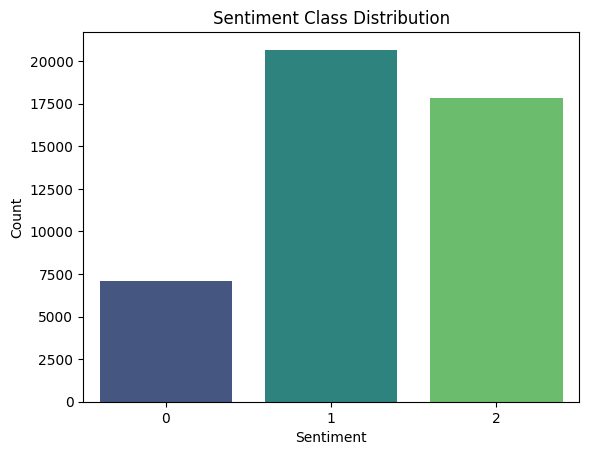

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='target', data=twitter_data, palette='viridis')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

0 --> Negative

1 --> Neutral

2 --> Positive

Tweet Length Distribution

In [ ]:
twitter_data['tweet_length'] = twitter_data['text'].apply(len)
twitter_data.head()

,text,target,tweet_length
0,"""QT @user In the original draft of the 7th boo...",2,119
1,"""Ben Smith / Smith (concussion) remains out of...",1,84
2,Sorry bout the stream last night I crashed out...,1,124
3,Chase Headley's RBI double in the 8th inning o...,1,139
4,@user Alciato: Bee will invest 150 million in ...,2,114


Tweet Length Distribution Histogram

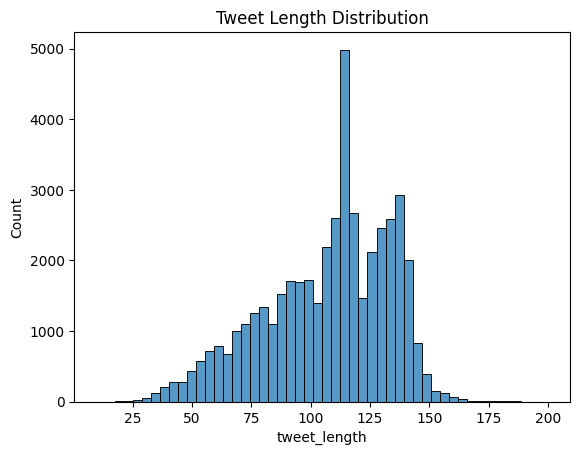

In [ ]:
sns.histplot(twitter_data['tweet_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.show()

Tweet Length Distribution Pie Chart

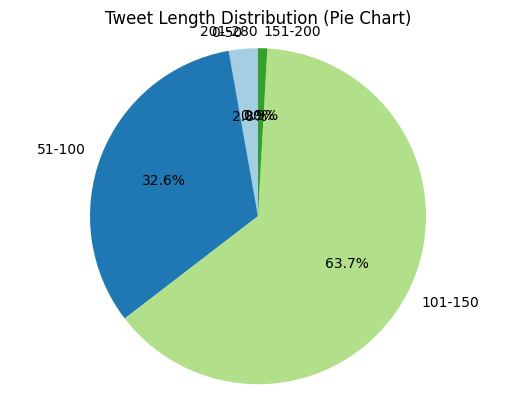

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate tweet length
twitter_data['tweet_length'] = twitter_data['text'].apply(len)

# Define categories
bins = [0, 50, 100, 150, 200, 280]  # Twitter max length = 280 chars
labels = ['0-50', '51-100', '101-150', '151-200', '201-280']

# Categorize tweets
twitter_data['length_category'] = pd.cut(twitter_data['tweet_length'], bins=bins, labels=labels, right=True)

# Count category frequencies
length_counts = twitter_data['length_category'].value_counts().sort_index()

# Plot pie chart
plt.pie(length_counts, labels=length_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Tweet Length Distribution (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()

Word Clouds - for each sentiment (positive & negative tweets)

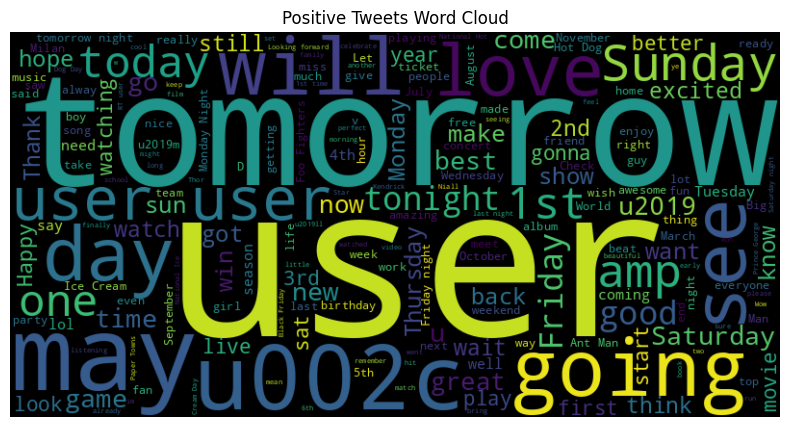

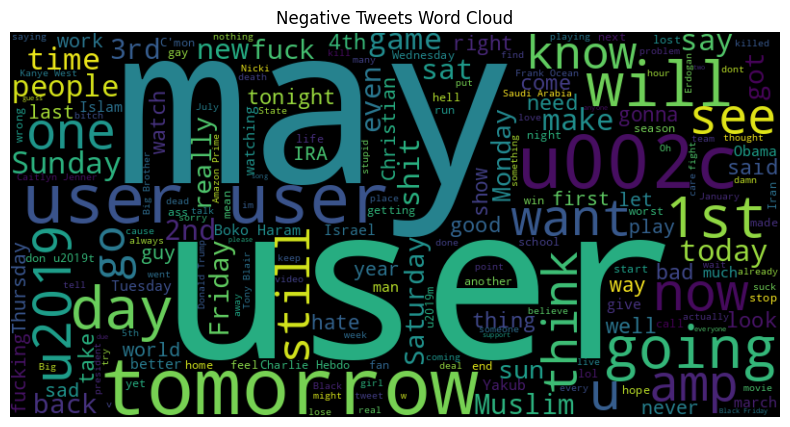

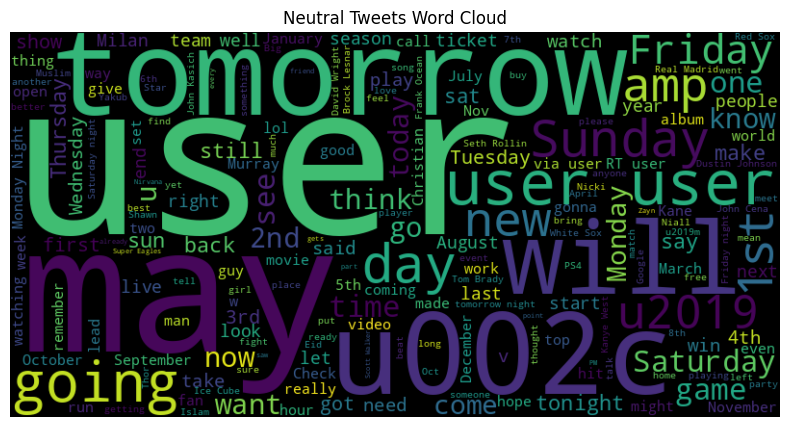

In [ ]:
from wordcloud import WordCloud

pos_text = " ".join(twitter_data[twitter_data['target'] == 2]['text'])
neg_text = " ".join(twitter_data[twitter_data['target'] == 0]['text'])
neutral_text = " ".join(twitter_data[twitter_data['target'] == 1]['text'])

# Positive tweets word cloud
pos_wc = WordCloud(width=800, height=400).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets Word Cloud")
plt.show()

# Negative tweets word cloud
neg_wc = WordCloud(width=800, height=400).generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets Word Cloud")
plt.show()

# Neutral tweets word cloud
neutral_wc = WordCloud(width=800, height=400).generate(neutral_text)
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Tweets Word Cloud")
plt.show()


Most Frequently Used Words

/tmp/ipython-input-783924476.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


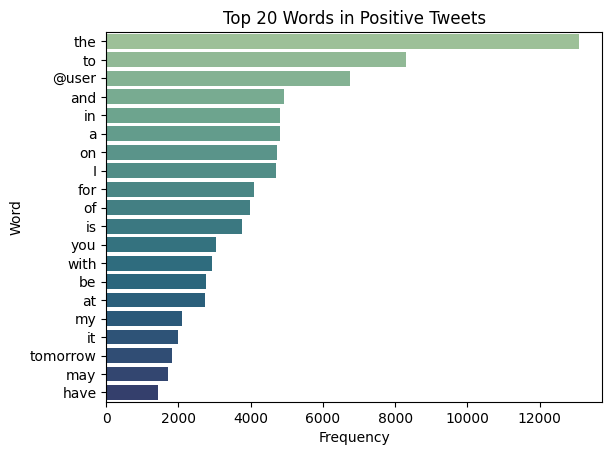

/tmp/ipython-input-783924476.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


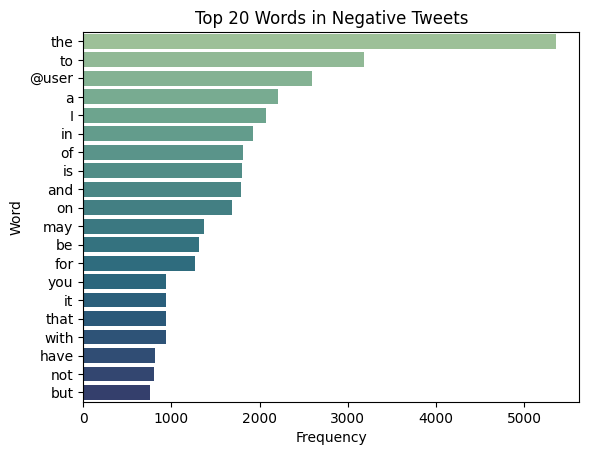

/tmp/ipython-input-783924476.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


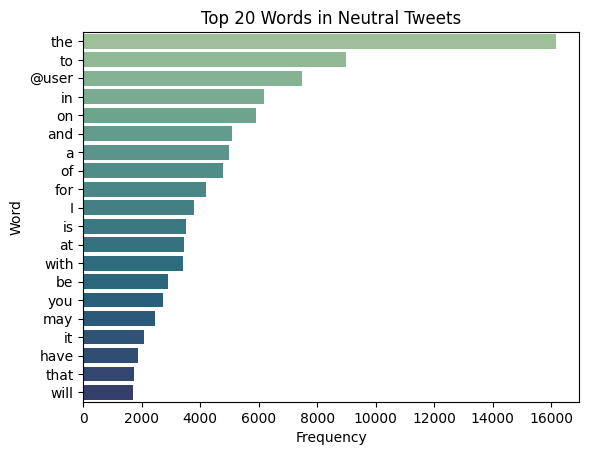

In [ ]:
from collections import Counter
import pandas as pd

# Positive tweets
positive_words = " ".join(twitter_data[twitter_data['target']==2]['text']).split()
word_freq = Counter(positive_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Positive Tweets')
plt.show()

# Negative Tweets
negative_words = " ".join(twitter_data[twitter_data['target']==0]['text']).split()
word_freq = Counter(negative_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Negative Tweets')
plt.show()

# Neutral Tweets
neutral_words = " ".join(twitter_data[twitter_data['target']==1]['text']).split()
word_freq = Counter(neutral_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Neutral Tweets')
plt.show()

**DATA PREPROCESSING**

Dropping the neutral rows

In [ ]:
# Drop rows where label == 1
twitter_data = twitter_data[twitter_data['target'] != 1].copy()

# Reset index after dropping
twitter_data = twitter_data.reset_index(drop=True)

print(twitter_data['target'].value_counts())
print(twitter_data.shape)

target
2    17849
0     7093
Name: count, dtype: int64
(24942, 4)


Converting the target label for positive tweets from '2' -> '1'

---



In [ ]:
 twitter_data.replace({'target':{2:1}},inplace=True)

In [ ]:
twitter_data.sample(5)

,text,target,tweet_length,length_category
1421,Don't miss the Golden Opportunity Sales Event ...,1,109,101-150
3099,@user cool beans :) try and let me know by the...,1,90,51-100
15718,@user John Cooper Clarke tomorrow night. Just ...,1,116,101-150
10494,News in on John Cena possibility hurt at a liv...,0,139,101-150
9846,Some people may not bother but Happy Birthday ...,1,116,101-150


In [ ]:
# Checking the ditribution of traget column
twitter_data['target'].value_counts()

,count
target,
1,17849
0,7093


'0' --> Negative Tweet


'1' --> Positive Tweet

Dropping columns that are not required

In [ ]:
# twitter_data= twitter_data.drop(columns=['ids', 'date', 'flag', 'user'])

In [ ]:
# twitter_data.head()

In [ ]:
twitter_data.shape

(24942, 3)

Removing Dupliactes

In [ ]:
twitter_data = twitter_data.drop_duplicates(subset='text')

In [ ]:
twitter_data.shape

(24933, 4)

In [ ]:
# Checking the ditribution of traget column
twitter_data['target'].value_counts()

,count
target,
1,17841
0,7092


**DATA CLEANING**

**STEMMING** - Process of reducing a word into it's key/root word

Example - actor,actress,acting = act

&

**REMOVING NOISY TWEETS** - like the ones having emojis, urls, etc which do not affect the sentiment of the tweet

&

**REMOVAL OF STOPWORDS** - Removing words like 'a','an','my', etc. that do not directly affect the sentiment of the tweet

from nltk.stem.porter import PorterStemmer
import re

port_stem = PorterStemmer()

def stemming(content):    # we will pass the text column as content in this stemming function
  stemmed_content= re.sub('[^a-zA-Z]'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)
  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters
  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords
  stemmed_content= ' '.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet

  return stemmed_content

- Applying the 'stemming' function to the dataset we have
- Creating a new column called 'stemmed_content'

twitter_data['stemmed_content']= twitter_data['text'].apply(stemming)

In [ ]:
'''
from nltk.stem.porter import PorterStemmer
import re

port_stem = PorterStemmer()
'''

'\nfrom nltk.stem.porter import PorterStemmer\nimport re\n\nport_stem = PorterStemmer()\n'

In [ ]:
'''
def stemming(content):    # we will pass the text column as content in this stemming function
  stemmed_content= re.sub('[^a-zA-Z]'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)
  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters
  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords
  stemmed_content= ' '.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet

  return stemmed_content
'''

'\ndef stemming(content):    # we will pass the text column as content in this stemming function\n  stemmed_content= re.sub(\'[^a-zA-Z]\'," ", content)   # Removing everything that is not a lowercase or uppercase letter in the tweet (eg- @,;,etc.)\n  stemmed_content= stemmed_content.lower()   # converting upper case letters to lower case letters\n  stemmed_content= stemmed_content.split()   # split all the stemmed content words from the teweet and store them in a list\n  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words(\'english\')]   # Performing stemming & Keeping only the words in the processed stem content that do not belong to the stopwords\n  stemmed_content= \' \'.join(stemmed_content)   # Joining all the words of stem content of a tweet into a single tweet\n\n  return stemmed_content\n'

In [ ]:
'''
# Applying the 'stemming' function to the dataset we have
# Creating a new column called 'stemmed_content'

twitter_data['stemmed_content']= twitter_data['text'].apply(stemming)
'''

"\n# Applying the 'stemming' function to the dataset we have\n# Creating a new column called 'stemmed_content'\n\ntwitter_data['stemmed_content']= twitter_data['text'].apply(stemming)\n"

**PREPROCESSING TECHNIQUES** - Lemmetization, Tokenization, Stopword Removal, Lowercasing, Removal of emojis, hashtags, punctuation, etc.

In [ ]:
# Downloading the stopwords
import nltk
nltk.download('stopwords')

# Printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# ADVANCED TEXT PREPROCESSING

# This step cleans the tweets more aggressively than before to reduce noise and improve accuracy.

import re
import string
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags symbol (keep the text)
    text = re.sub(r'#', '', text)
    # Remove emojis and non-ASCII
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove repeated characters (e.g., loooove -> love)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [w for w in words if w not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

# Apply cleaning to the dataset
twitter_data['clean_tweet'] = twitter_data['text'].apply(clean_tweet)
print("Sample cleaned tweets:", twitter_data['clean_tweet'].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Sample cleaned tweets: 0    qt original draft th book remus lupin survived...
1    alciato bee invest million january another sum...
2    lit mum kerry louboutins wonder many willam ow...
3    soul train oct halloween special ft tdot fines...
4    disappointed wwe summerslam want see john cena...
Name: clean_tweet, dtype: object


In [ ]:
twitter_data.sample(5)

,text,target,tweet_length,length_category,clean_tweet
16092,Couldn't hang on to stay up and watch 3rd set ...,1,133,101-150,couldnt hang stay watch rd set nice see serena...
9635,While that may be Obama has gotten us into one...,0,115,101-150,may obama gotten u one hell mess make worse da...
16380,""": Shinji Kagawa held a coaching clinic for st...",1,123,101-150,shinji kagawa held coaching clinic student tue...
10014,@user Will do! Not sure when it'll be up- appa...,1,140,101-150,sure itll apparently may end bbc whichd nice o...
4144,August 13 2015/1975: A celebration of 40 years...,1,99,51-100,august celebration year since grateful dead le...


In [ ]:
twitter_data.shape

(24933, 5)

In [ ]:
print(twitter_data['clean_tweet'])

0        qt original draft th book remus lupin survived...
1        alciato bee invest million january another sum...
2        lit mum kerry louboutins wonder many willam ow...
3        soul train oct halloween special ft tdot fines...
4        disappointed wwe summerslam want see john cena...
                               ...                        
24937    michael good time nd greatest michael michael ...
24938    think misguided girl vip tonight suckin dick w...
24939    amazing beautiful lady gaga show ac tonight lo...
24940    september arrived mean apple new iphone hour a...
24941    leeds sheff wed giuseppe bellusci securing luf...
Name: clean_tweet, Length: 24933, dtype: object


In [ ]:
# Separating the data (tweet/text) and label(target)
X= twitter_data['clean_tweet'].values
Y= twitter_data['target'].values

In [ ]:
print(X)

['qt original draft th book remus lupin survived battle hogwarts happybirthdayremuslupin'
 'alciato bee invest million january another summer plan bring messi'
 'lit mum kerry louboutins wonder many willam owns look kerry warner wednesday'
 ... 'amazing beautiful lady gaga show ac tonight love girl britney'
 'september arrived mean apple new iphone hour away becoming official thing'
 'leeds sheff wed giuseppe bellusci securing lufc point chris maguire opened scoring']


In [ ]:
print(Y)

[1 1 1 ... 1 1 1]


**TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# X_train, X_test, Y_train, Y_test are the 4 arrays
# X_train contains all the training data tweets and their corresponding targets are stored in the Y_train
# X_test contains all the test data tweets and their corresponding targets are stored in the Y_test
# test_size= 0.2 --> means 20% of the data is test data and the rest 80% data is used for training the ML model
# stratify=Y --> means that in the training Y_train data & the testing Y_test data , I want an almost equal proportion of 0 and 1 from the target column
# random_state= 'any no' --> everyone using the same value of random_state will have the same rows in the test data and the train data

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(24933,) (19946,) (4987,)


In [ ]:
print(Y.shape, y_train.shape, y_test.shape)

(24933,) (19946,) (4987,)


In [ ]:
print(X_train)

['comedian chelsea lately fox theatre tomorrow ium excited'
 'wasnt fair fight prof seth rollins cant win title wo someone taking opponent st'
 'im zan lean nun irene today band camp jus laugh poo as freshman snare drummer'
 ...
 'renner hit ebron post route touchdown tarheel pat good tarheel left st qtr'
 'sometimes need obnoxiously sing along mariah carey rainy tuesday morning'
 'donut want take act tomorrow']


In [ ]:
print(X_test)

['course true racist beside obama beat st thing contact sellout tk'
 'billy cundiff may leaving washington hopefully wonut miss door way'
 'wow marcos vp martial lawuc enrile nd powerful man philippine' ...
 'cant kendrick rap every song like black friday old kendrick better'
 'sister sat asked katie going sleep little old imaginary frienduc donut ya think'
 'must give boy spot back viewed video hr directioners tomorrow boy night littlethingsvideocountdown']


**FEATURE ENGINEERING**

**TF-IDF Vectorizer** --> used to convert textual/raw data into numerical data, that the model can understand, based on the weights given to each word or phrase depeding on it's frequency. Lesser the frequency of a word, more is the wight associated to it.

Then the ML model will associate the numerical data,i.e, weights associated to the words/phrases to the target labels(0 or 1) and work on it.

TF-IDF stands for Term Frequency – Inverse Document Frequency.

It assigns a weight to each word (or phrase) based on:

Term Frequency (TF) → How often the word appears in a tweet.

Inverse Document Frequency (IDF) → How rare the word is across all tweets.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [ ]:
X_train= vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [ ]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 218551 stored elements and shape (19946, 26005)>
  Coords	Values
  (0, 4454)	0.4666692270302093
  (0, 3896)	0.3377970489559209
  (0, 12730)	0.45357244234725463
  (0, 8383)	0.39259635209848115
  (0, 22714)	0.3758376187795411
  (0, 23194)	0.14424051886194228
  (0, 11576)	0.27869454477475664
  (0, 7416)	0.2617694364572825
  (1, 24781)	0.2759716227575269
  (1, 7609)	0.27407183355131304
  (1, 7950)	0.2543399200297154
  (1, 17850)	0.33739529092935083
  (1, 20189)	0.26422323255158775
  (1, 19291)	0.26471231747926
  (1, 3432)	0.18454812483350153
  (1, 25246)	0.1989859256802814
  (1, 23080)	0.27728909518286626
  (1, 25363)	0.3171217500606733
  (1, 21099)	0.24898227898829883
  (1, 22322)	0.260066620362396
  (1, 16321)	0.3554389025291256
  (1, 21461)	0.1524496546529784
  (2, 10931)	0.11812098756945325
  (2, 25926)	0.32118332047463083
  (2, 12839)	0.28176532345690314
  :	:
  (19943, 9245)	0.12755824785510997
  (19943, 12879)	0.198232817

In [ ]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50957 stored elements and shape (4987, 26005)>
  Coords	Values
  (0, 1948)	0.25415559403835597
  (0, 2150)	0.41209704197773417
  (0, 4729)	0.35061136232447937
  (0, 4957)	0.31086758007718046
  (0, 16004)	0.26624805730489587
  (0, 18232)	0.3425249377170389
  (0, 20095)	0.45273686566117516
  (0, 21461)	0.16556914357329422
  (0, 22819)	0.22508178776645707
  (0, 23593)	0.2734172622293739
  (1, 2323)	0.3882906699149593
  (1, 5221)	0.40283300828173485
  (1, 6377)	0.35080020956203045
  (1, 10502)	0.2913020902024303
  (1, 12860)	0.33167960656018597
  (1, 14074)	0.13385144107874078
  (1, 14610)	0.2418001079225914
  (1, 24779)	0.35266436500789405
  (1, 24835)	0.23612399463670214
  (1, 25410)	0.33543504772585103
  (2, 7119)	0.43766341482867177
  (2, 13774)	0.23576822402757702
  (2, 13950)	0.4557671925639209
  (2, 15368)	0.1850747105110495
  (2, 17096)	0.3688834530588555
  :	:
  (4984, 16171)	0.30414779731638264
  (4984, 18351)	0.405858

All the words in each tweet get associated to a numerical value.

Example - here all the words in the tweet with 0 index are converted to numerical data

  (0, 222329)	0.45902566553974955
  (0, 286158)	0.36307656788596043
  (0, 358197)	0.30487157492746747
  (0, 408896)	0.663912210812278
  (0, 436771)	0.23863127215930252
  (0, 453351)	0.25845668749555184

BALANCING THE POSITIVE AND NEGATIVE CLASSES - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original distribution
print("Original class distribution:", Counter(y_train))

# Apply SMOTE only on training data (never on test data!)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new distribution
print("Resampled class distribution:", Counter(y_train_resampled))


Original class distribution: Counter({np.int64(1): 14273, np.int64(0): 5673})
Resampled class distribution: Counter({np.int64(1): 14273, np.int64(0): 14273})


**MODEL SELECTION AND TRAINING**

Writing code for all baseline ML models

Running models after SMOTE

Original class distribution: Counter({np.int64(1): 14273, np.int64(0): 5673})
Resampled class distribution: Counter({np.int64(1): 14273, np.int64(0): 14273})
Training Logistic Regression...
Logistic Regression Test Accuracy: 0.8374

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1419
           1       0.90      0.87      0.88      3568

    accuracy                           0.84      4987
   macro avg       0.80      0.81      0.80      4987
weighted avg       0.84      0.84      0.84      4987



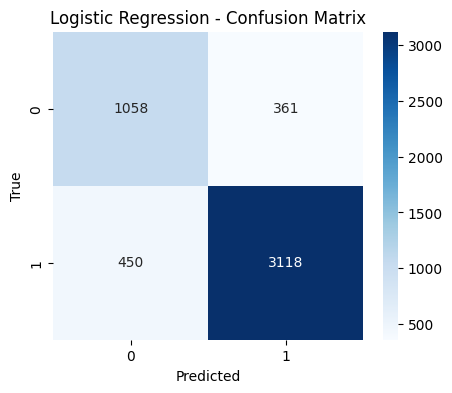

Training Naive Bayes...
Naive Bayes Test Accuracy: 0.8207

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      1419
           1       0.90      0.85      0.87      3568

    accuracy                           0.82      4987
   macro avg       0.78      0.80      0.79      4987
weighted avg       0.83      0.82      0.82      4987



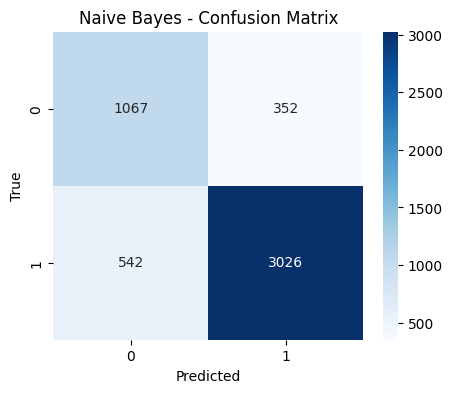

Training Linear SVM...
Linear SVM Test Accuracy: 0.8394

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1419
           1       0.89      0.89      0.89      3568

    accuracy                           0.84      4987
   macro avg       0.80      0.80      0.80      4987
weighted avg       0.84      0.84      0.84      4987



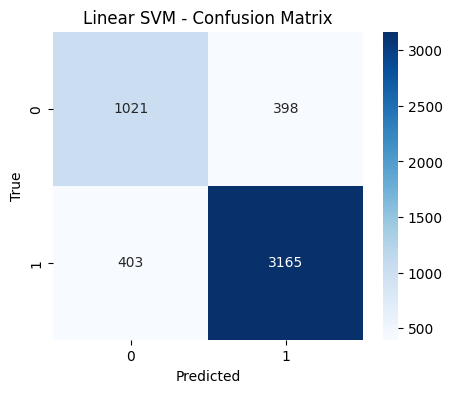

Training KNN...
KNN Test Accuracy: 0.4161

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.97      0.49      1419
           1       0.94      0.20      0.33      3568

    accuracy                           0.42      4987
   macro avg       0.63      0.58      0.41      4987
weighted avg       0.76      0.42      0.37      4987



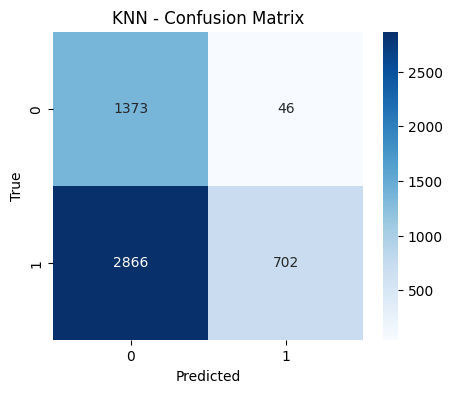

Training Random Forest...
Random Forest Test Accuracy: 0.8143

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.49      0.60      1419
           1       0.82      0.94      0.88      3568

    accuracy                           0.81      4987
   macro avg       0.80      0.72      0.74      4987
weighted avg       0.81      0.81      0.80      4987



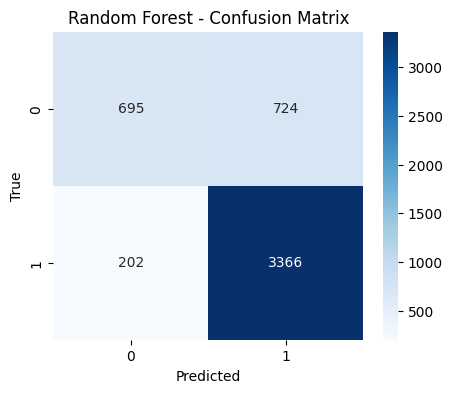

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:39:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 0.8033

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.46      0.57      1419
           1       0.81      0.94      0.87      3568

    accuracy                           0.80      4987
   macro avg       0.78      0.70      0.72      4987
weighted avg       0.80      0.80      0.79      4987



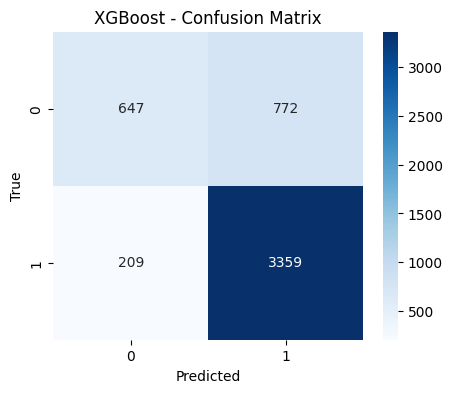

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:40:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble Voting Classifier
Accuracy: 0.8376

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1419
           1       0.90      0.87      0.88      3568

    accuracy                           0.84      4987
   macro avg       0.80      0.81      0.81      4987
weighted avg       0.84      0.84      0.84      4987



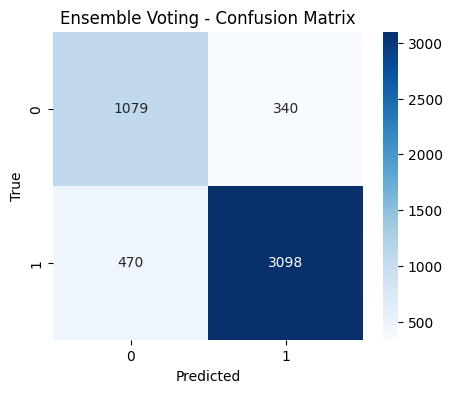

In [ ]:
# ============================
# IMPORTS
# ============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE  # for balancing classes

# If XGBoost is installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost not installed, skipping...")

# ============================
# APPLY SMOTE
# ============================
print("Original class distribution:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_train_resampled))

# ============================
# DEFINE MODELS (DEFAULT PARAMS)
# ============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# ============================
# TRAIN + EVALUATE MODELS
# ============================
for name, model in models.items():
    print("="*60)
    print(f"Training {name}...")

    model.fit(X_train_resampled, y_train_resampled)  # train on SMOTE data
    y_pred = model.predict(X_test)  # test on original data

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ============================
# ENSEMBLE VOTING
# ============================
estimators = [(name, model) for name, model in models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting="hard")
voting_clf.fit(X_train_resampled, y_train_resampled)

y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("="*60)
print("Ensemble Voting Classifier")
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Ensemble Voting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Evaluation

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:06:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:07:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.837377   0.896235  0.873879  0.884916
1          Naive Bayes  0.820734   0.895796  0.848094  0.871293
2           Linear SVM  0.839382   0.888296  0.887052  0.887674
3                  KNN  0.416082   0.938503  0.196749  0.325301
4        Random Forest  0.814317   0.822983  0.943386  0.879081
5              XGBoost  0.803289   0.813120  0.941424  0.872581
6      Voting Ensemble  0.837578   0.901105  0.868274  0.884385


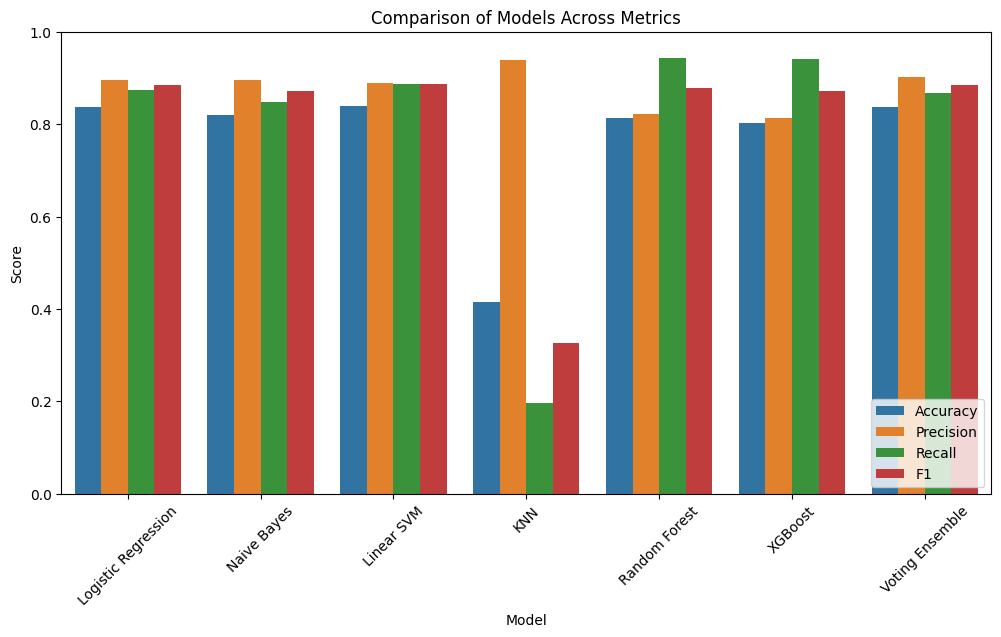

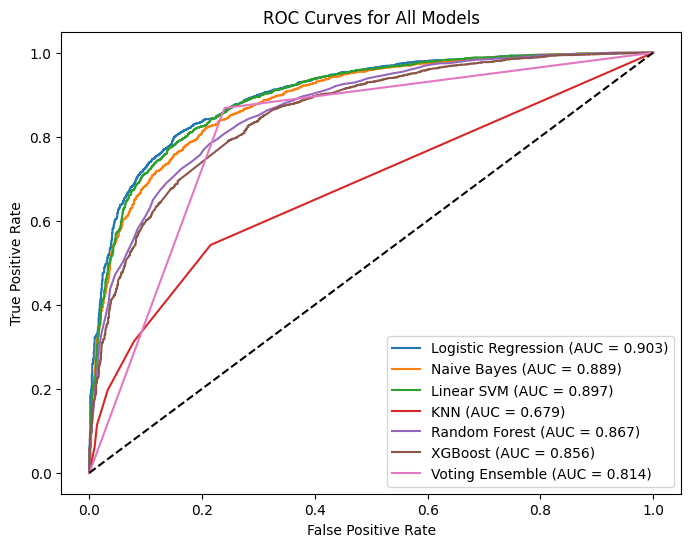

In [ ]:
# ============================
# IMPORTS
# ============================
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

# ============================
# EVALUATE ALL MODELS AND STORE METRICS
# ============================
metrics_list = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # For ROC-AUC, need probability scores or decision function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        # Use decision function for models like LinearSVC
        y_score = model.decision_function(X_test)

    metrics_list.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "y_score": y_score  # store for ROC curve
    })

# Ensemble Voting
estimators = [(name, model) for name, model in models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting="hard")
voting_clf.fit(X_train_resampled, y_train_resampled)
y_pred = voting_clf.predict(X_test)
# Use majority vote as probabilities for ROC-AUC approximation
y_score = voting_clf.predict_proba(X_test)[:,1] if hasattr(voting_clf, "predict_proba") else y_pred

metrics_list.append({
    "Model": "Voting Ensemble",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "y_score": y_score
})

# ============================
# CREATE DATAFRAME
# ============================
metrics_df = pd.DataFrame(metrics_list)
metrics_df_display = metrics_df.drop(columns=["y_score"])
print(metrics_df_display)

# ============================
# BAR CHART COMPARISON
# ============================
metrics_melted = metrics_df_display.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(12,6))
sns.barplot(data=metrics_melted, x="Model", y="Score", hue="Metric")
plt.title("Comparison of Models Across Metrics")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()

# ============================
# ROC CURVES
# ============================
plt.figure(figsize=(8,6))
for i, row in metrics_df.iterrows():
    fpr, tpr, _ = roc_curve(y_test, row["y_score"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{row['Model']} (AUC = {roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()


Applying Randomized Search CV to all models, except RandomForest

Original class distribution: Counter({np.int64(1): 14273, np.int64(0): 5673})
Resampled class distribution: Counter({np.int64(1): 14273, np.int64(0): 14273})
Tuning Logistic Regression...
Best Params for Logistic Regression: {'solver': 'saga', 'C': np.float64(35.93813663804626)}
Logistic Regression Test Accuracy: 0.8328

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1419
           1       0.88      0.88      0.88      3568

    accuracy                           0.83      4987
   macro avg       0.79      0.79      0.79      4987
weighted avg       0.83      0.83      0.83      4987



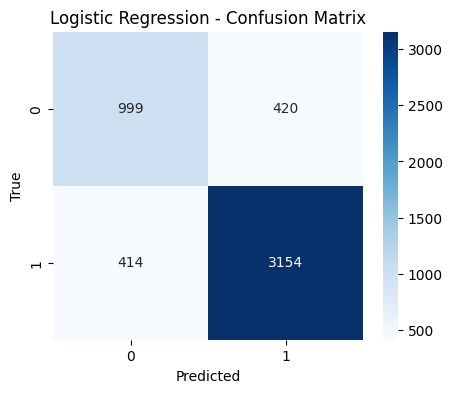

Tuning Naive Bayes...
Best Params for Naive Bayes: {'alpha': np.float64(0.1)}
Naive Bayes Test Accuracy: 0.8097

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.68      1419
           1       0.88      0.85      0.87      3568

    accuracy                           0.81      4987
   macro avg       0.77      0.78      0.77      4987
weighted avg       0.81      0.81      0.81      4987



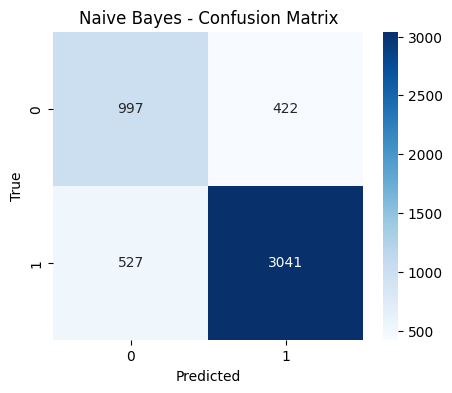

Tuning Linear SVM...
Best Params for Linear SVM: {'C': np.float64(1.668100537200059)}
Linear SVM Test Accuracy: 0.8368

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1419
           1       0.88      0.89      0.89      3568

    accuracy                           0.84      4987
   macro avg       0.80      0.80      0.80      4987
weighted avg       0.84      0.84      0.84      4987



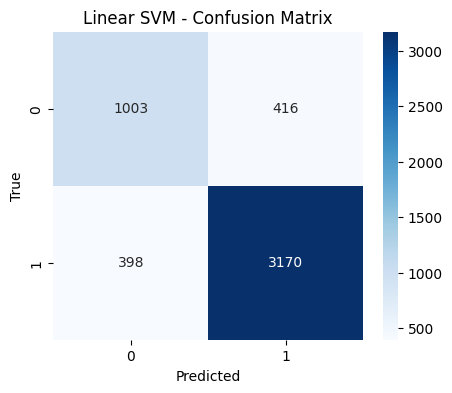

Tuning KNN...


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Params for KNN: {'weights': 'distance', 'n_neighbors': 3}
KNN Test Accuracy: 0.4474

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.95      0.49      1419
           1       0.92      0.25      0.39      3568

    accuracy                           0.45      4987
   macro avg       0.63      0.60      0.44      4987
weighted avg       0.76      0.45      0.42      4987



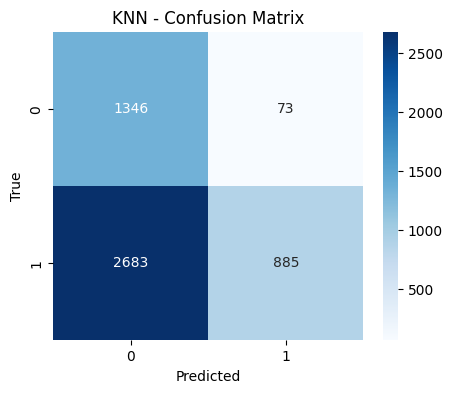

Tuning Random Forest...
Random Forest Test Accuracy: 0.8143

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.49      0.60      1419
           1       0.82      0.94      0.88      3568

    accuracy                           0.81      4987
   macro avg       0.80      0.72      0.74      4987
weighted avg       0.81      0.81      0.80      4987



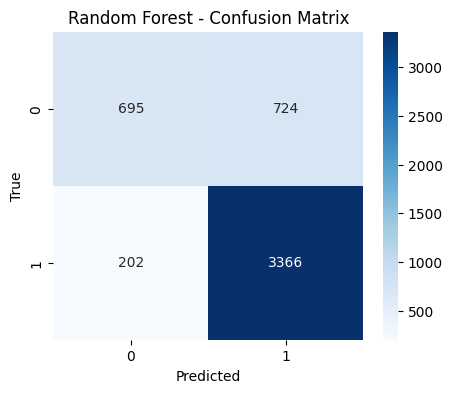

Tuning Decision Tree...
Best Params for Decision Tree: {'min_samples_split': 10, 'max_depth': None, 'criterion': 'gini'}
Decision Tree Test Accuracy: 0.7696

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.58      1419
           1       0.83      0.85      0.84      3568

    accuracy                           0.77      4987
   macro avg       0.72      0.71      0.71      4987
weighted avg       0.77      0.77      0.77      4987



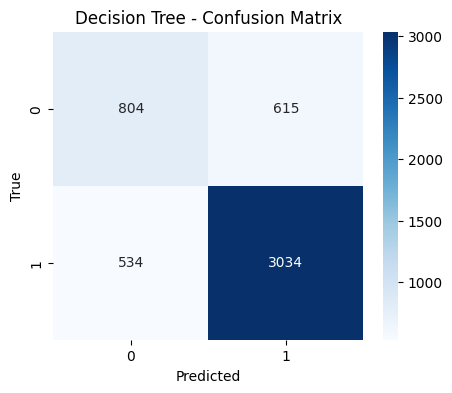

Tuning XGBoost...


KeyboardInterrupt: 

In [ ]:
# ============================
# IMPORTS
# ============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE  # for balancing classes

# If XGBoost is installed
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost not installed, skipping...")

# ============================
# APPLY SMOTE
# ============================
print("Original class distribution:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_train_resampled))

# ============================
# DEFINE MODELS + PARAM GRIDS
# ============================
param_grids = {
    "Logistic Regression": {
        "C": np.logspace(-2, 2, 10),
        "solver": ["liblinear", "saga"]
    },
    "Naive Bayes": {
        "alpha": np.linspace(0.1, 1.0, 10)
    },
    "Linear SVM": {
        "C": np.logspace(-2, 2, 10)
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    # Random Forest is left untuned to save time
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10]
    }
}

if xgb_available:
    param_grids["XGBoost"] = {
        "n_estimators": [100, 200, 300],
        "max_depth": [4, 6, 8],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }

base_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),  # not tuned
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

if xgb_available:
    base_models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# ============================
# TRAIN + EVALUATE MODELS
# ============================
best_models = {}

for name, model in base_models.items():
    print("="*60)
    print(f"Tuning {name}...")

    param_grid = param_grids.get(name, {})
    if param_grid:  # tune if params exist
        search = RandomizedSearchCV(
            model,
            param_distributions=param_grid,
            n_iter=10,  # increased for better accuracy
            scoring="accuracy",
            cv=3,
            random_state=42,
            n_jobs=-1
        )
        search.fit(X_train_resampled, y_train_resampled)
        best_model = search.best_estimator_
        print(f"Best Params for {name}: {search.best_params_}")
    else:
        model.fit(X_train_resampled, y_train_resampled)
        best_model = model

    # Save best model
    best_models[name] = best_model

    # Evaluate
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ============================
# ENSEMBLE VOTING
# ============================
estimators = [(name, model) for name, model in best_models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting="hard")
voting_clf.fit(X_train_resampled, y_train_resampled)

y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("="*60)
print("Ensemble Voting Classifier")
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Ensemble Voting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Applying GridSearchCV to all models, except RF

Original class distribution: Counter({np.int64(1): 14273, np.int64(0): 5673})
Resampled class distribution: Counter({np.int64(1): 14273, np.int64(0): 14273})
Tuning Logistic Regression...
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Best Params for Logistic Regression: {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Test Accuracy: 0.8406

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1419
           1       0.90      0.88      0.89      3568

    accuracy                           0.84      4987
   macro avg       0.80      0.81      0.81      4987
weighted avg       0.84      0.84      0.84      4987



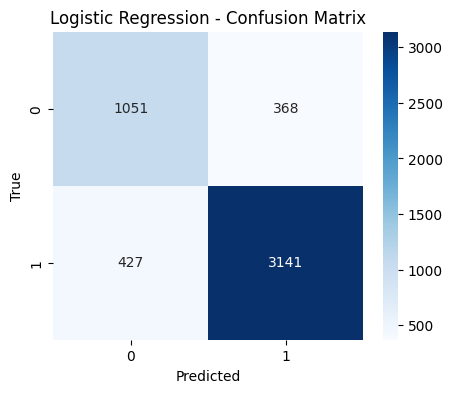

Tuning Naive Bayes...
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Params for Naive Bayes: {'alpha': 0.5}
Naive Bayes Test Accuracy: 0.8167

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1419
           1       0.89      0.85      0.87      3568

    accuracy                           0.82      4987
   macro avg       0.77      0.79      0.78      4987
weighted avg       0.82      0.82      0.82      4987



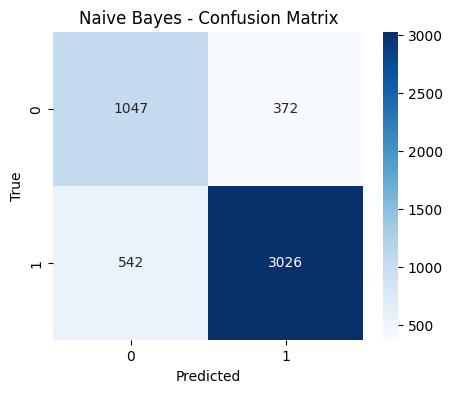

Tuning Linear SVM...
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Params for Linear SVM: {'C': 2}
Linear SVM Test Accuracy: 0.8352

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1419
           1       0.88      0.89      0.89      3568

    accuracy                           0.84      4987
   macro avg       0.80      0.80      0.80      4987
weighted avg       0.83      0.84      0.83      4987



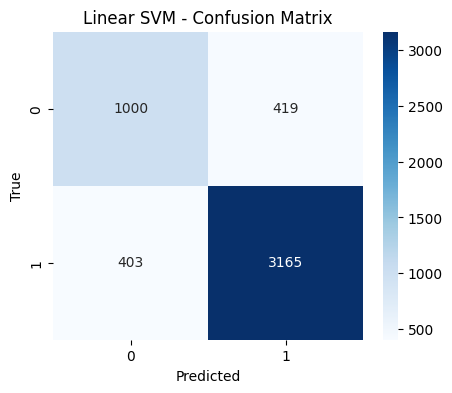

Tuning KNN...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Params for KNN: {'n_neighbors': 3, 'weights': 'distance'}
KNN Test Accuracy: 0.4474

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.95      0.49      1419
           1       0.92      0.25      0.39      3568

    accuracy                           0.45      4987
   macro avg       0.63      0.60      0.44      4987
weighted avg       0.76      0.45      0.42      4987



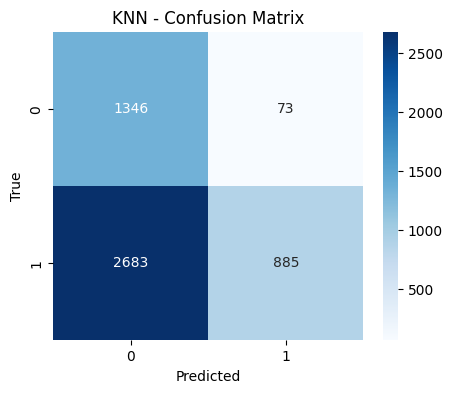

Tuning Decision Tree...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': 20}
Decision Tree Test Accuracy: 0.7347

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      1419
           1       0.77      0.89      0.83      3568

    accuracy                           0.73      4987
   macro avg       0.66      0.62      0.63      4987
weighted avg       0.71      0.73      0.71      4987



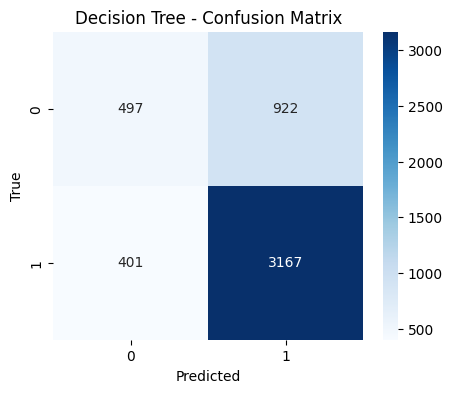

Tuning Random Forest...
Random Forest Test Accuracy: 0.7959

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.54      0.60      1419
           1       0.83      0.90      0.86      3568

    accuracy                           0.80      4987
   macro avg       0.75      0.72      0.73      4987
weighted avg       0.79      0.80      0.79      4987



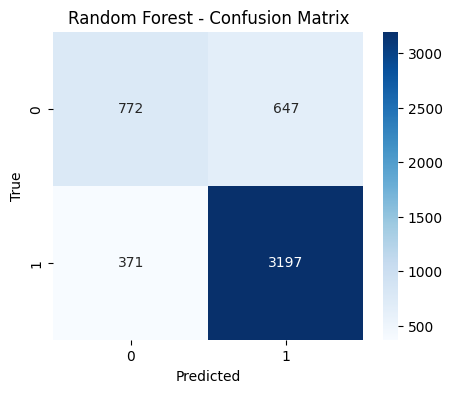

Tuning XGBoost...
Fitting 2 folds for each of 16 candidates, totalling 32 fits


KeyboardInterrupt: 

In [ ]:
# ============================
# IMPORTS
# ============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost not installed, skipping...")

# ============================
# APPLY SMOTE
# ============================
print("Original class distribution:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter(y_train_resampled))

# ============================
# BASE MODELS
# ============================
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver="liblinear"),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20),
}

if xgb_available:
    base_models["XGBoost"] = XGBClassifier(
        use_label_encoder=False, eval_metric="logloss", n_estimators=200, max_depth=6, learning_rate=0.1
    )

# ============================
# PARAM GRIDS (light + effective)
# ============================
param_grids = {
    "Logistic Regression": {
        "C": [0.5, 1, 2],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    },
    "Naive Bayes": {
        "alpha": [0.5, 1.0]
    },
    "Linear SVM": {
        "C": [0.5, 1, 2]
    },
    "KNN": {
        "n_neighbors": [3, 5],
        "weights": ["uniform", "distance"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20]
    },
    # Random Forest is already tuned manually (skip GridSearch for runtime reasons)
}

if xgb_available:
    param_grids["XGBoost"] = {
        "n_estimators": [100, 200],
        "max_depth": [4, 6],
        "learning_rate": [0.05, 0.1],
        "subsample": [0.8, 1.0],
    }

# ============================
# GRID SEARCH
# ============================
best_models = {}

for name, model in base_models.items():
    print("="*60)
    print(f"Tuning {name}...")

    if name in param_grids:  # Apply GridSearchCV
        grid = GridSearchCV(model, param_grids[name], cv=2, n_jobs=-1, verbose=1)
        grid.fit(X_train_resampled, y_train_resampled)
        best_models[name] = grid.best_estimator_
        print(f"Best Params for {name}: {grid.best_params_}")
    else:  # Random Forest directly
        model.fit(X_train_resampled, y_train_resampled)
        best_models[name] = model

    # Evaluate
    y_pred = best_models[name].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ============================
# HARD VOTING ENSEMBLE
# ============================
estimators = [(name, model) for name, model in best_models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting="hard")
voting_clf.fit(X_train_resampled, y_train_resampled)

y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("="*60)
print("Hard Voting Ensemble Classifier")
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Hard Voting Ensemble - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Evaluating all baseline models + tuned LR & tuned XGBOOST

Original class distribution: Counter({np.int64(1): 14273, np.int64(0): 5673})
Resampled class distribution: Counter({np.int64(1): 14273, np.int64(0): 14273})
Training Logistic Regression...
Best Params for Logistic Regression: {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}


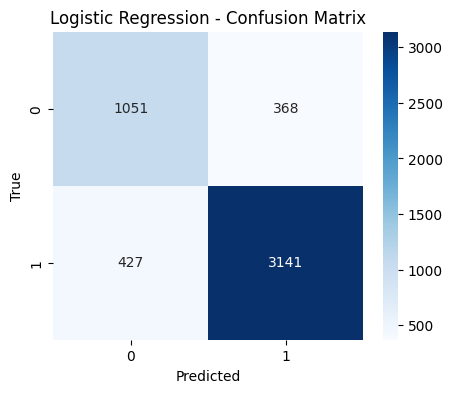

Training Naive Bayes...


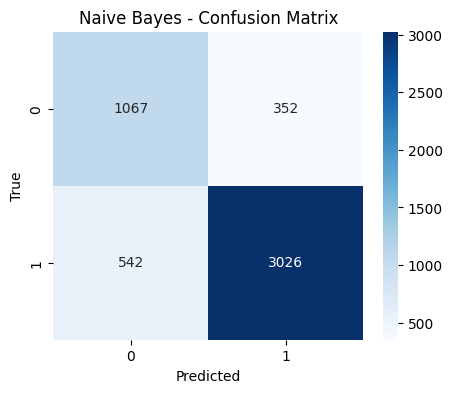

Training Linear SVM...


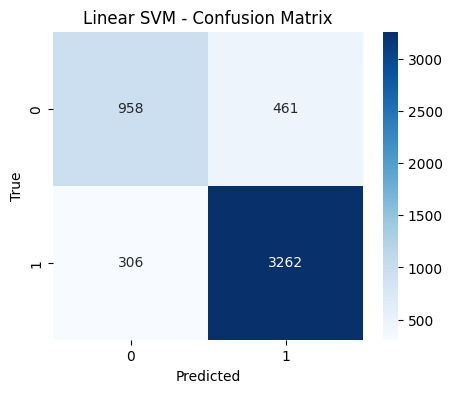

Training KNN...


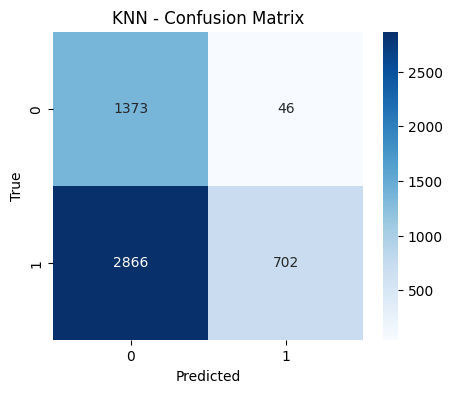

Training Decision Tree...


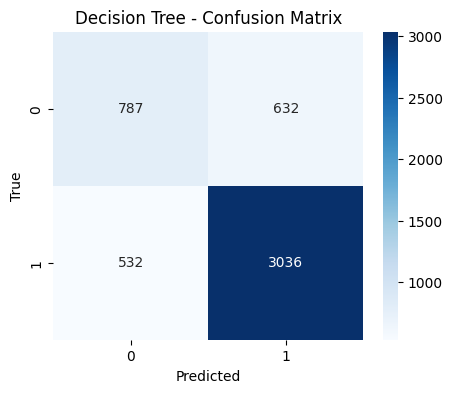

Training Random Forest...


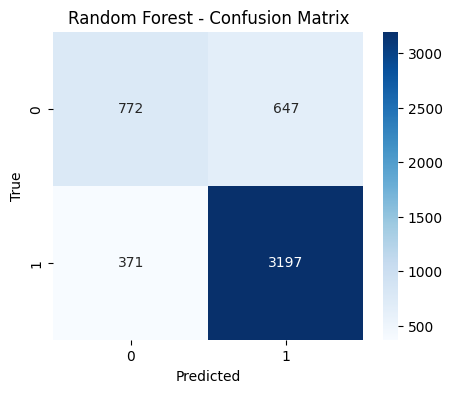

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}


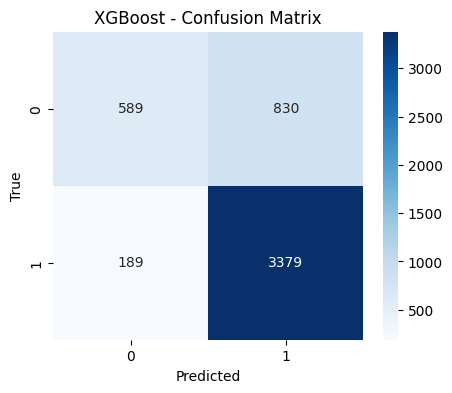

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:50:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Metrics Table ===
                      Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression   0.840586   0.803111  0.810494  0.806621  0.904680
Naive Bayes           0.820734   0.779471  0.800016  0.788024  0.889104
Linear SVM            0.846200   0.817043  0.794680  0.804464  0.899961
KNN                   0.416082   0.631200  0.582166  0.405316  0.679019
Decision Tree         0.766593   0.712182  0.702756  0.707005  0.702756
Random Forest         0.795869   0.753551  0.720033  0.732655  0.844536
XGBoost               0.795669   0.779936  0.681055  0.702579  0.847615
Hard Voting Ensemble  0.843994   0.809113  0.805660  0.807350       NaN


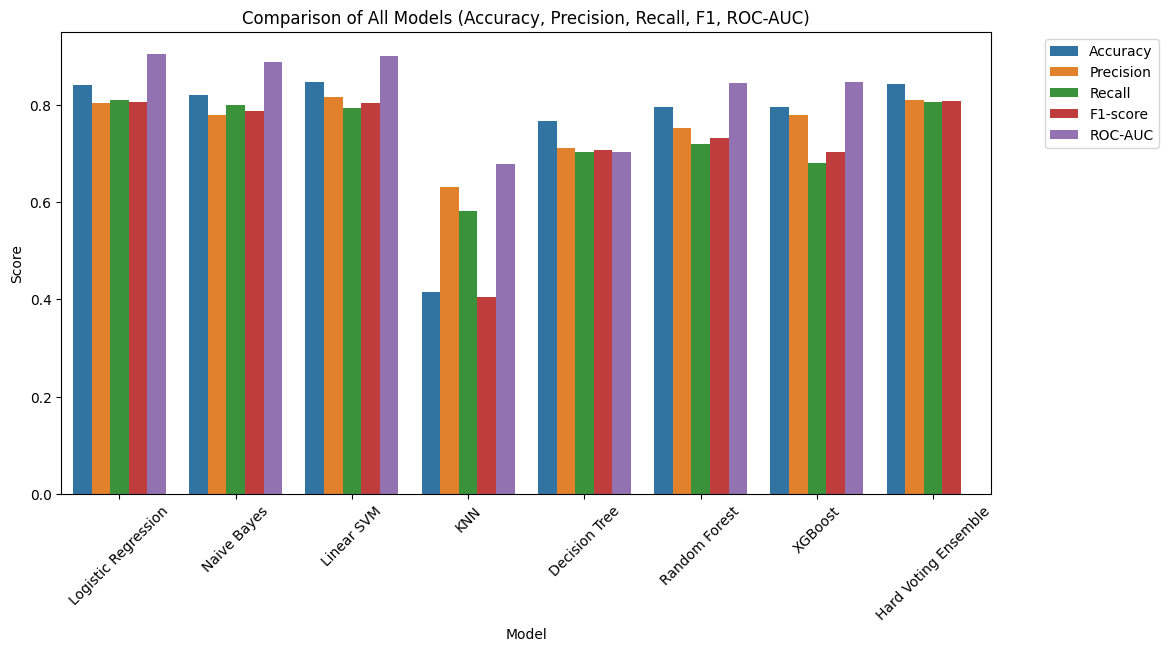

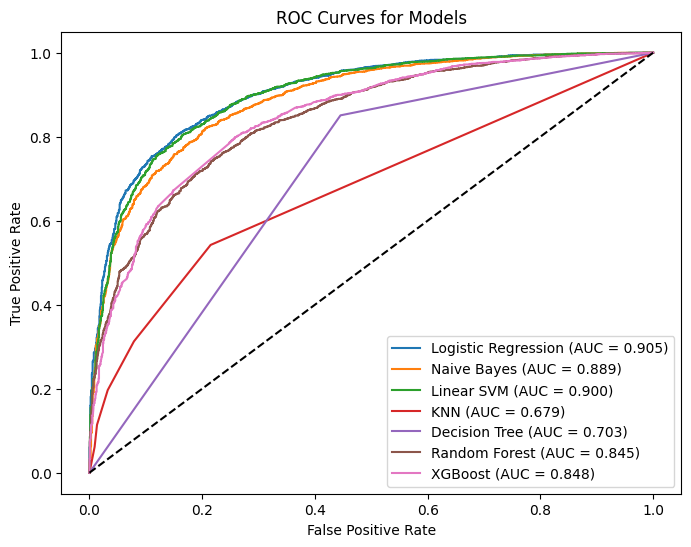

In [ ]:
# ============================
# IMPORTS
# ============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_recall_fscore_support, roc_curve, auc, roc_auc_score
)
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

from imblearn.over_sampling import SMOTE

try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost not installed, skipping...")

# ============================
# APPLY SMOTE
# ============================
print("Original class distribution:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter(y_train_resampled))

# ============================
# BASE MODELS
# ============================
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, solver="liblinear"),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20),
}

if xgb_available:
    base_models["XGBoost"] = XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    )

# ============================
# PARAM GRIDS (only LR + XGB)
# ============================
param_grids = {
    "Logistic Regression": {
        "C": [0.5, 1, 2],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    }
}

if xgb_available:
    param_grids["XGBoost"] = {
        "n_estimators": [100, 200],
        "max_depth": [4, 6],
        "learning_rate": [0.05, 0.1],
        "subsample": [0.8, 1.0],
    }

# ============================
# TRAIN + COLLECT METRICS
# ============================
metrics_list = {}
best_models = {}

for name, model in base_models.items():
    print("="*60)
    print(f"Training {name}...")

    if name in param_grids:  # tune LR + XGB
        grid = GridSearchCV(model, param_grids[name], cv=2, n_jobs=-1, verbose=0)
        grid.fit(X_train_resampled, y_train_resampled)
        best_models[name] = grid.best_estimator_
        print(f"Best Params for {name}: {grid.best_params_}")
    else:
        model.fit(X_train_resampled, y_train_resampled)
        best_models[name] = model

    # If model doesn't support predict_proba → wrap with calibration
    if hasattr(best_models[name], "predict_proba"):
        y_proba = best_models[name].predict_proba(X_test)[:, 1] if len(np.unique(y_test)) == 2 else None
    else:
        try:
            calibrated = CalibratedClassifierCV(best_models[name], cv=2)
            calibrated.fit(X_train_resampled, y_train_resampled)
            y_proba = calibrated.predict_proba(X_test)[:, 1] if len(np.unique(y_test)) == 2 else None
            best_models[name] = calibrated  # replace with calibrated
        except Exception:
            y_proba = None

    y_pred = best_models[name].predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="macro", zero_division=0
    )

    metrics_list[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_test),
                yticklabels=np.unique(y_test))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ============================
# HARD VOTING ENSEMBLE
# ============================
estimators = [(name, model) for name, model in best_models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting="hard")
voting_clf.fit(X_train_resampled, y_train_resampled)

y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average="macro", zero_division=0
)

metrics_list["Hard Voting Ensemble"] = {
    "Accuracy": acc,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "ROC-AUC": np.nan  # Hard voting doesn't give probs
}

# ============================
# METRICS TABLE
# ============================
metrics_df = pd.DataFrame(metrics_list).T
print("\n=== Metrics Table ===")
print(metrics_df)

# ============================
# BAR CHART COMPARISON
# ============================
metrics_melted = metrics_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x="index", y="Score", hue="Metric")
plt.xticks(rotation=45)
plt.title("Comparison of All Models (Accuracy, Precision, Recall, F1, ROC-AUC)")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# ============================
# ROC-AUC CURVES (only prob models)
# ============================
plt.figure(figsize=(8, 6))
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend(loc="lower right")
plt.show()


ROC-AUC for all baseline + Ensemble models

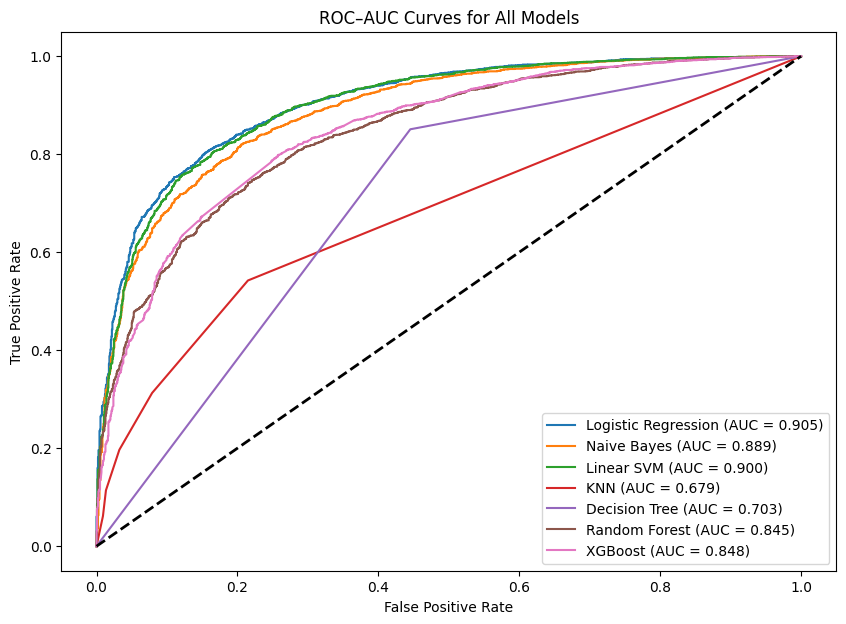

In [ ]:
# ============================
# ROC–AUC CURVES (ALL MODELS + ENSEMBLE)
# ============================
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure binary labels
y_test_bin = label_binarize(y_test, classes=[0,1]).ravel()

plt.figure(figsize=(10,7))

for name, model in best_models.items():
    # Not all models have predict_proba (like LinearSVC), so handle decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        continue  # skip models that can't give scores

    fpr, tpr, _ = roc_curve(y_test_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Add Hard Voting Ensemble
if hasattr(voting_clf, "predict_proba"):
    y_score_ensemble = voting_clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_bin, y_score_ensemble)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Hard Voting Ensemble (AUC = {roc_auc:.3f})")

# Plot settings
plt.plot([0,1], [0,1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curves for All Models")
plt.legend(loc="lower right")
plt.show()


Text vs Clean_tweet

In [ ]:
twitter_data.head()

,text,target,tweet_length,clean_tweet
0,"""QT @user In the original draft of the 7th boo...",1,119,qt original draft th book remus lupin survived...
1,@user Alciato: Bee will invest 150 million in ...,1,114,alciato bee invest million january another sum...
2,@user LIT MY MUM 'Kerry the louboutins I wonde...,1,101,lit mum kerry louboutins wonder many willam ow...
3,"""\"""""""" SOUL TRAIN\"""""""" OCT 27 HALLOWEEN SPECIA...",1,145,soul train oct halloween special ft tdot fines...
4,So disappointed in wwe summerslam! I want to s...,0,78,disappointed wwe summerslam want see john cena...


Text length distribution of clean_tweets

In [ ]:
twitter_data['clean_tweet_length'] = twitter_data['clean_tweet'].apply(len)
twitter_data.head()

,text,target,tweet_length,clean_tweet,clean_tweet_length
0,"""QT @user In the original draft of the 7th boo...",1,119,qt original draft th book remus lupin survived...,86
1,@user Alciato: Bee will invest 150 million in ...,1,114,alciato bee invest million january another sum...,66
2,@user LIT MY MUM 'Kerry the louboutins I wonde...,1,101,lit mum kerry louboutins wonder many willam ow...,76
3,"""\"""""""" SOUL TRAIN\"""""""" OCT 27 HALLOWEEN SPECIA...",1,145,soul train oct halloween special ft tdot fines...,104
4,So disappointed in wwe summerslam! I want to s...,0,78,disappointed wwe summerslam want see john cena...,59


Histogram showing clean_tweet_length ditribution

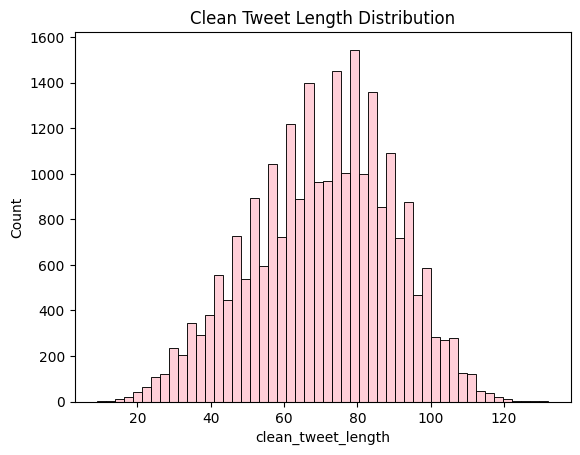

In [ ]:
sns.histplot(twitter_data['clean_tweet_length'], bins=50, color='pink')
plt.title("Clean Tweet Length Distribution")
plt.show()

Visual Comparision between 'Original Tweet Length' and 'Clean Tweet Length'

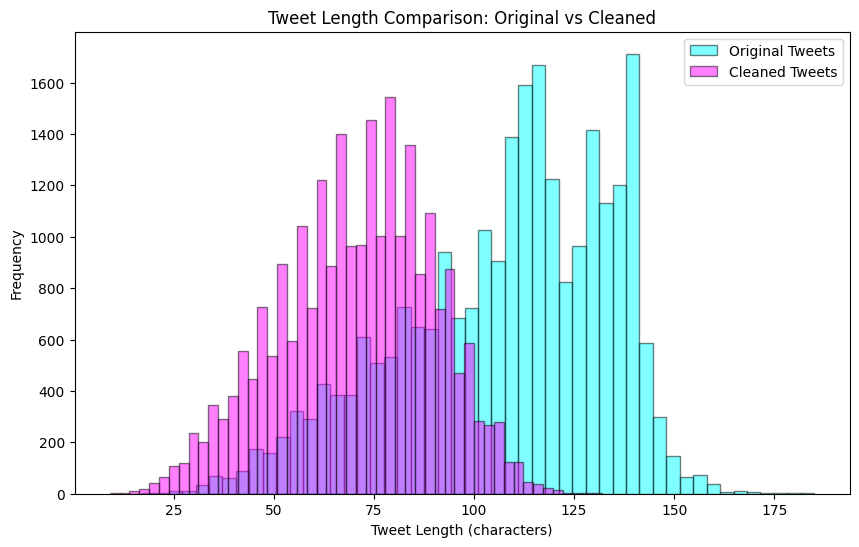

In [ ]:
# Plot comparison
plt.figure(figsize=(10,6))
plt.hist(twitter_data['tweet_length'], bins=50, alpha=0.5, label='Original Tweets', color='cyan', edgecolor='black')
plt.hist(twitter_data['clean_tweet_length'], bins=50, alpha=0.5, label='Cleaned Tweets', color='magenta', edgecolor='black')

plt.title('Tweet Length Comparison: Original vs Cleaned')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
twitter_data['target'].value_counts()

,count
target,
1,17841
0,7092


Word Cloud and most Used Words -- on Clean_tweets

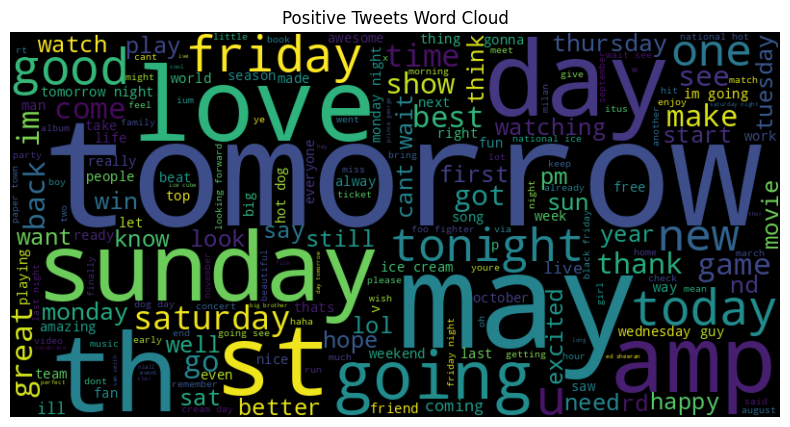

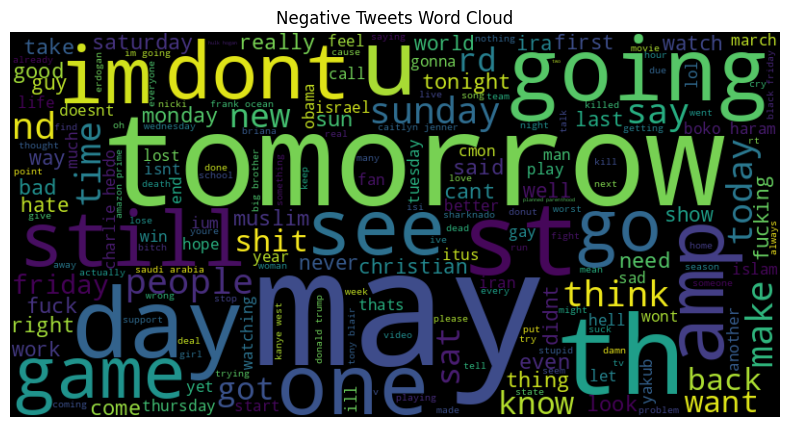

In [ ]:
# Word Cloud

from wordcloud import WordCloud

neg_text = " ".join(twitter_data[twitter_data['target'] == 0]['clean_tweet'])
pos_text = " ".join(twitter_data[twitter_data['target'] == 1]['clean_tweet'])

# Positive tweets word cloud
pos_wc = WordCloud(width=800, height=400).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets Word Cloud")
plt.show()

# Negative tweets word cloud
neg_wc = WordCloud(width=800, height=400).generate(neg_text)
plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets Word Cloud")
plt.show()


/tmp/ipython-input-309817229.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


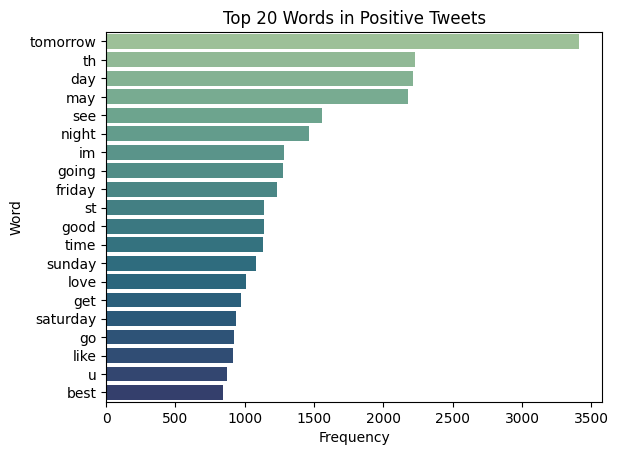

/tmp/ipython-input-309817229.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')


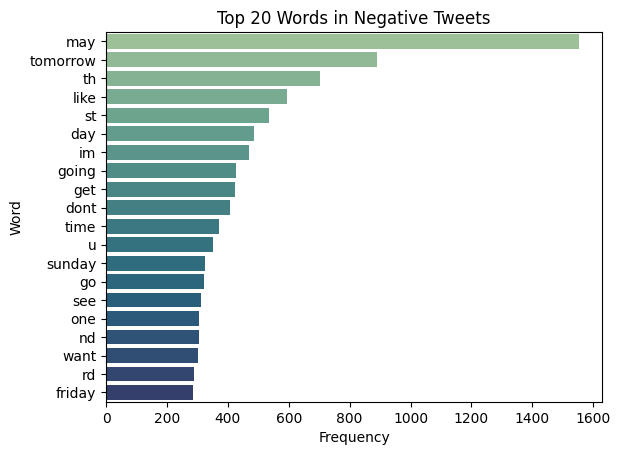

In [ ]:
# Most used words

from collections import Counter
import pandas as pd

# Positive tweets
positive_words = " ".join(twitter_data[twitter_data['target']==1]['clean_tweet']).split()
word_freq = Counter(positive_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Positive Tweets')
plt.show()

# Negative Tweets
negative_words = " ".join(twitter_data[twitter_data['target']==0]['clean_tweet']).split()
word_freq = Counter(negative_words)
common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

sns.barplot(x='Frequency', y='Word', data=common_words, palette='crest')
plt.title('Top 20 Words in Negative Tweets')
plt.show()
